# Exercises

Let's examine the relationship between these two measured variables:

Wing length | Tail length
--- | ---
10.4 | 7.4
10.8 | 7.6
11.1 | 7.9
10.2 | 7.2
10.3 | 7.4
10.2 | 7.1
10.7 | 7.4
10.5 | 7.2
10.8 | 7.8
11.2 | 7.7
10.6 | 7.8
11.4 | 8.3

Assume Wing length is the $X$ variable and Tail Length is the $Y$ variable, both measured in cm.

##### 1\. Plot X vs Y. Do they look related?

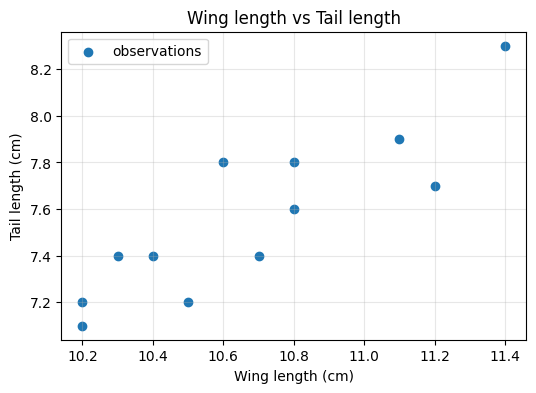

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import atanh, tanh, sqrt
import scipy.stats as stats

# Wing length (X) and Tail length (Y) data
x = np.array([10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4])
y = np.array([7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3])

# Scatter plot
plt.figure(figsize=(6,4))
plt.scatter(x, y, color='tab:blue', label='observations')

plt.xlabel('Wing length (cm)')
plt.ylabel('Tail length (cm)')
plt.title('Wing length vs Tail length')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

##### 2\. Calculate $r_{X,Y}$ and $r_{Y,X}$, first using the equations above and then using either the Python numpy funciton [corrcoef](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) or Matlab's built-in [corrcoef](https://www.mathworks.com/help/matlab/ref/corrcoef.html). Did you get the same answers?

In [7]:
# Compute Pearson correlation using numpy.corrcoef
corr_matrix = np.corrcoef(x, y)
r_xy = corr_matrix[0,1]
r_yx = corr_matrix[1,0]

print(f"r(x,y) = {r_xy:.4f}")
print(f"r(y,x) = {r_yx:.4f}")

r(x,y) = 0.8704
r(y,x) = 0.8704


##### 3\. What is the standard error of $r_{X,Y}$? The 95% confidence intervals computed from the standard error?

In [8]:
# Sample size
n = len(x)
# correlation (from previous cell)
r = np.corrcoef(x,y)[0,1]

# 1) Approximate standard error of r (Fisher z-approx gives se for z)
# For Fisher z transform, se_z = 1/sqrt(n-3)
se_r_approx = np.sqrt((1 - r**2) / (n - 2))
se_z = 1.0 / np.sqrt(n - 3)

# 95% CI via Fisher z transform
z = atanh(r)  # fisher z
z_crit = 1.96  # normal approx for 95%
z_lo, z_hi = z - z_crit * se_z, z + z_crit * se_z
ci_fisher = (tanh(z_lo), tanh(z_hi))

# 95% CI via approximate SE on r (not recommended for r near ±1)
r_lo_approx = r - z_crit * se_r_approx
r_hi_approx = r + z_crit * se_r_approx

print(f"r = {r:.6f}")
print()
print(f"Approximate SE of r (sqrt((1-r^2)/(n-2))) = {se_r_approx:.6f}")
print(f"Fisher z SE (1/sqrt(n-3)) = {se_z:.6f}")
print()
print("95% CI (Fisher z transform):", f"({ci_fisher[0]:.6f}, {ci_fisher[1]:.6f})")
print("95% CI (approx using SE of r):", f"({r_lo_approx:.6f}, {r_hi_approx:.6f})")

r = 0.870355

Approximate SE of r (sqrt((1-r^2)/(n-2))) = 0.155719
Fisher z SE (1/sqrt(n-3)) = 0.333333

95% CI (Fisher z transform): (0.592303, 0.963161)
95% CI (approx using SE of r): (0.565146, 1.175563)


##### 4\. Should the value of $r_{X,Y}$ be considered significant at the *p*<0.05 level, given a two-tailed test (i.e., we reject if the test statistic is too large on either tail of the null distribution) for $H_0: r_{X,Y}=0$?

In [9]:
#Hypothesis test for H0: ρ=0 vs H1: ρ≠0 using t-distribution
df = n - 2
t_stat = r * sqrt((n - 2) / (1 - r**2))
p_two_tailed = 2 * stats.t.sf(abs(t_stat), df)

print(f"r = {r:.6f}")
print(f"t-statistic = {t_stat:.6f}")
print(f"n = {n}, df = {df}")
print(f"p = {p_two_tailed:.6e}")

alpha = 0.05
if p_two_tailed < alpha:
    print(f"Reject H0 at alpha={alpha} (p={p_two_tailed:.4e})")
else:
    print(f"Fail to reject H0 at alpha={alpha} (p={p_two_tailed:.4e})")

r = 0.870355
t-statistic = 5.589277
n = 12, df = 10
p = 2.311059e-04
Reject H0 at alpha=0.05 (p=2.3111e-04)


##### 5\. Yale does the exact same study and finds that his correlation value is 0.75. Is this the same as yours? That is, evaluate $𝐻_0: r=0.75$.

In [10]:
# Test H0: ρ = 0.75 vs H1: ρ ≠ 0.75 
r_obs = r
r_null = 0.75

# Fisher z values
z_obs = atanh(r_obs)
z_null = atanh(r_null)
se_z = 1.0 / sqrt(n - 3)
z_stat = (z_obs - z_null) / se_z

# two-tailed p-value using normal distribution
from scipy import stats
p_two_tailed = 2 * stats.norm.sf(abs(z_stat))

print(f"Observed r = {r_obs:.6f}")
print(f"Null r = {r_null:.6f}")
print(f"z-statistic = {z_stat:.6f}")
print(f"two-tailed p-value = {p_two_tailed:.6e}")

alpha = 0.05
if p_two_tailed < alpha:
    print(f"Reject H0: r = {r_null} at alpha={alpha} (p={p_two_tailed:.4e})")
else:
    print(f"Fail to reject H0: r = {r_null} at alpha={alpha} (p={p_two_tailed:.4e})")

Observed r = 0.870355
Null r = 0.750000
z-statistic = 1.084755
two-tailed p-value = 2.780303e-01
Fail to reject H0: r = 0.75 at alpha=0.05 (p=2.7803e-01)


##### 6\. Finally, calculate the statistical power and sample size needed to reject $H_0:r=0\:when\:r\ge 0.5$.

In [ ]:
# Hypothesized true correlation under H1 to plan for (effect size)
r_true = 0.5  # the alternative of interest (r >= 0.5)
alpha = 0.05  # significance level
# compute one-sided power (H0: r=0 vs H1: r>0, rejecting H0 when r >= 0.5)

def power_for_r(n, r_alt, alpha=0.05, two_sided=False):
    """Compute approximate power to detect correlation r_alt at sample size n.
    Uses Fisher z-transform and normal approximation.
    If two_sided is False, returns one-sided power.
    """
    # Fisher z for alt and null (null r=0 -> z0=0)
    z_alt = atanh(r_alt)
    z0 = 0.0
    se_z = 1.0 / sqrt(n - 3)

    # critical value on z-scale for test of H0: r=0
    if two_sided:
        z_crit = stats.norm.ppf(1 - alpha / 2)
        # power = P(Z > z_crit - (z_alt - z0)/se_z) + P(Z < -z_crit - (z_alt - z0)/se_z)
        delta = (z_alt - z0) / se_z
        power = stats.norm.sf(z_crit - delta) + stats.norm.cdf(-z_crit - delta)
    else:
        z_crit = stats.norm.ppf(1 - alpha)
        delta = (z_alt - z0) / se_z
        power = stats.norm.sf(z_crit - delta)

    return power

# 1) Power at the current sample size for r = 0.5 (one-sided)
power_current = power_for_r(n, r_true, alpha=alpha, two_sided=False)

# 2) Find minimal n required to achieve target power(s) for r=0.5
def required_n_for_power(r_alt, target_power=0.8, alpha=0.05, two_sided=False, n_min=4, n_max=1000):
    for nn in range(max(n_min,4), n_max+1):
        pwr = power_for_r(nn, r_alt, alpha=alpha, two_sided=two_sided)
        if pwr >= target_power:
            return nn, pwr
    return None, None

n80, p80 = required_n_for_power(r_true, target_power=0.8, alpha=alpha, two_sided=False, n_max=500)
n90, p90 = required_n_for_power(r_true, target_power=0.9, alpha=alpha, two_sided=False, n_max=500)

print(f"Current n = {n}")
print(f"Power (one-sided) to detect r = {r_true} at current n: {power_current:.4f}")
if n80 is not None:
    print(f"Minimum n for 80% power (one-sided) to detect r = {r_true}: n = {n80} (power={p80:.4f})")
else:
    print("Could not find n up to search limit for 80% power")
if n90 is not None:
    print(f"Minimum n for 90% power (one-sided) to detect r = {r_true}: n = {n90} (power={p90:.4f})")
else:
    print("Could not find n up to search limit for 90% power")


Current n = 12
Power (one-sided) to detect r = 0.5 at current n: 0.5012
Minimum n for 80% power (one-sided) to detect r = 0.5: n = 24 (power=0.8085)
Minimum n for 90% power (one-sided) to detect r = 0.5: n = 32 (power=0.9055)
